# Лабороторная работа № 1

## Решение краевой задачи методом разностных апроксимаций

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Крайние точки интервала, количество точек n и константа k

In [2]:
x_a = -1
x_b = 1
k = 2
n = 1000

## Функция для создания системы 

In [3]:
def system_of_equations_builder(n, h, a_f, b_f):
    xi_list = [x_a + (h * i) for i in range(n + 1)]
    matrix = np.zeros((n - 1, n - 1))  # Матрица с системой
    vector = np.linspace(-h * h, -h * h, n - 1)  # Вектор ответов

    for i in range(n - 1):
        line = np.linspace(0, 0, n - 1)
        a = a_f(xi_list[i + 1])
        b = b_f(xi_list[i + 1])
        if i == 0:
            line[i:i + 2] = np.array([-(2 * a - (1 + b * (xi_list[i + 1] ** 2)) * h ** 2), a])
        elif i == (n - 2):
            line[i - 1:i + 1] = np.array([a, -(2 * a - (1 + b * (xi_list[i + 1] ** 2)) * h ** 2)])
        else:
            line[i - 1:i + 2] = np.array([a, -(2 * a - (1 + b * (xi_list[i + 1] ** 2)) * h ** 2), a])
        matrix[i, :] = line

    return matrix, vector, xi_list

## Решение системы с помощью  numpy 

In [4]:
def solve(matrix, vector, n):
    result = np.zeros(n + 1)
    result[1: n] = np.linalg.solve(matrix, vector)
    return result

## Функция определяющая погрешность вычислений 

In [5]:
def system_solve(n, a_f, b_f):
    h = (x_b - x_a) / n

    matrix, vector, X1 = system_of_equations_builder(n, h, a_f, b_f)
    Y1 = solve(matrix, vector, n)

    matrix, vector, X2 = system_of_equations_builder(n * 2, h / 2, a_f, b_f)
    Y2 = solve(matrix, vector, n * 2)

    diff = 0
    for i in range(n + 1):
        diff = max(abs(Y1[i] - Y2[2*i]), diff)

    print(diff)
    plt.plot(X1, Y1)

## Решение задание № 1

4.625170134664458e-07


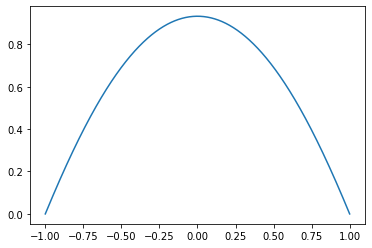

In [6]:
system_solve(n, lambda x=1: 1, lambda x=1: 1)
plt.show()

## Решение задние № 2 

4.53184309967547e-07


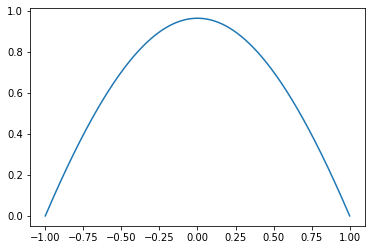

In [7]:
system_solve(n, lambda x: math.sin(k), lambda x: math.cos(k)) 
plt.show()

## Решение задние № 3 

7.564860110553795e-08


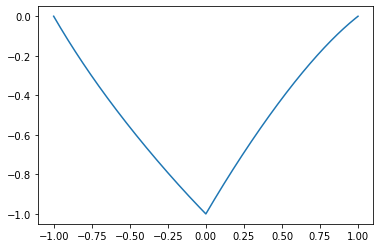

In [8]:
    system_solve(n, lambda x: math.sin(k * x), lambda x: math.cos(k * x))
    plt.show()

## Решение трёх заданий на одном графике 

4.625170134664458e-07
4.53184309967547e-07
7.564860110553795e-08


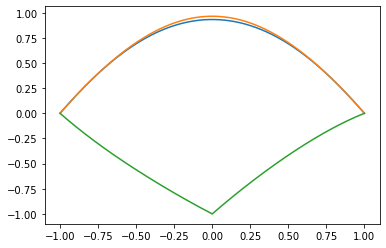

In [9]:
    system_solve(n, lambda x=1: 1, lambda x=1: 1)  # Первое
    system_solve(n, lambda x: math.sin(k), lambda x: math.cos(k))  # Второе
    system_solve(n, lambda x: math.sin(k * x), lambda x: math.cos(k * x))  # Третье
    plt.show()

In [12]:
def system_solve_new(n, a_f, b_f):
    for i in range(1, 10):
        n = n + 2
        h = (x_b - x_a) / n
        matrix, vector, X1 = system_of_equations_builder(n, h, a_f, b_f)
        Y1 = solve(matrix, vector, n)
        plt.plot(X1, Y1)
    plt.show()

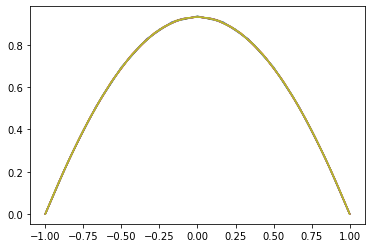

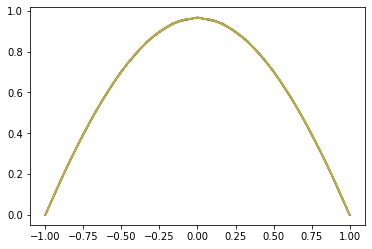

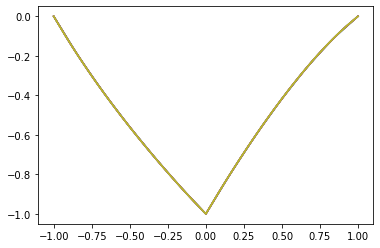

In [14]:
    system_solve_new(10, lambda x=1: 1, lambda x=1: 1)  # Первое
    system_solve_new(10, lambda x: math.sin(k), lambda x: math.cos(k))  # Второе
    system_solve_new(10, lambda x: math.sin(k * x), lambda x: math.cos(k * x))  # Третье